In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
from collections import Counter,defaultdict
import matplotlib.image as mpimg
from IPython.display import clear_output
import time
from  sklearn.model_selection import train_test_split
import sys,os
from shutil import copyfile
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [11]:
attribute_img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_img.txt'
attribute_cloth_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_cloth.txt'
img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/img/'

In [12]:
# attribute_img = pd.read_csv(attribute_img_path,delim_whitespace=True)
attribute_cloth = pd.read_csv(attribute_cloth_path, sep="\s\s+") # columns = ['attribute_name', 'attribute_type'])

# reading attribute_img_path chunksize wise

In [13]:
chunksize = 10 ** 4
attribute_type = 3

# print chunksize
# attribute_img = 0
dd = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type: 
                    dd.append(j+1)
dist = Counter(dd)
# print dist
print dist

Counter({597: 15989, 823: 14919, 354: 7488, 82: 6419, 227: 6220, 831: 6205, 621: 6065, 641: 5565, 832: 5212, 821: 5024, 359: 4841, 617: 4660, 122: 4150, 237: 4005, 94: 3716, 228: 3704, 699: 3684, 240: 3500, 840: 3491, 1: 3240, 818: 3201, 572: 3177, 945: 2355, 985: 2249, 698: 2228, 677: 2203, 748: 1959, 130: 1619, 776: 1505, 639: 1498, 357: 1301, 600: 1251, 71: 1233, 26: 1220, 785: 1116, 21: 1098, 39: 1094, 724: 978, 190: 925, 132: 863, 903: 852, 930: 840, 25: 833, 942: 781, 841: 716, 91: 705, 849: 675, 147: 667, 843: 638, 450: 631, 360: 629, 870: 620, 204: 615, 394: 583, 355: 524, 941: 514, 69: 487, 747: 487, 292: 479, 223: 477, 737: 470, 758: 468, 848: 443, 239: 434, 110: 432, 613: 419, 615: 419, 462: 405, 735: 404, 527: 402, 966: 398, 728: 395, 529: 385, 373: 373, 119: 369, 516: 363, 506: 363, 83: 359, 319: 353, 443: 350, 777: 338, 92: 325, 386: 319, 549: 298, 940: 287, 499: 268, 580: 259, 402: 255, 976: 252, 519: 240, 530: 240, 502: 234, 220: 232, 272: 232, 523: 226, 38: 222, 464: 2

In [14]:
chunksize = 10 ** 4

image_name = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['image_name']:
        image_name.append(i)
        
print len(image_name)

289222


In [15]:
print image_name[0]
print image_name[1]

img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
img/Sheer_Pleated-Front_Blouse/img_00000002.jpg


In [16]:
## root class distribution
import numpy as np

## convert 50 class to their names
order_map = {}
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        order_map[i+1] = attribute_cloth.iloc[i]['attribute_name']

    
# print order_map
print 
#   distribution
attribute_cloth_map = defaultdict()
    
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        attribute_cloth_map[i+1] = attribute_cloth.loc[i]['attribute_type']
    
print 'done'
print attribute_cloth_map
# right above it
    
class50_map = {}



done
defaultdict(None, {512: 3, 1: 3, 516: 3, 518: 3, 519: 3, 523: 3, 527: 3, 529: 3, 530: 3, 21: 3, 25: 3, 26: 3, 548: 3, 549: 3, 38: 3, 39: 3, 554: 3, 556: 3, 55: 3, 572: 3, 573: 3, 735: 3, 580: 3, 69: 3, 70: 3, 71: 3, 82: 3, 83: 3, 597: 3, 600: 3, 91: 3, 92: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 613: 3, 614: 3, 615: 3, 616: 3, 617: 3, 621: 3, 110: 3, 119: 3, 122: 3, 123: 3, 124: 3, 639: 3, 641: 3, 130: 3, 132: 3, 147: 3, 148: 3, 149: 3, 150: 3, 153: 3, 676: 3, 677: 3, 168: 3, 171: 3, 739: 3, 698: 3, 699: 3, 190: 3, 191: 3, 201: 3, 204: 3, 206: 3, 719: 3, 724: 3, 214: 3, 728: 3, 804: 3, 220: 3, 223: 3, 737: 3, 738: 3, 227: 3, 228: 3, 229: 3, 743: 3, 976: 3, 551: 3, 748: 3, 237: 3, 239: 3, 240: 3, 242: 3, 243: 3, 758: 3, 759: 3, 257: 3, 258: 3, 260: 3, 776: 3, 777: 3, 270: 3, 271: 3, 272: 3, 785: 3, 292: 3, 903: 3, 818: 3, 821: 3, 823: 3, 312: 3, 315: 3, 317: 3, 319: 3, 320: 3, 833: 3, 834: 3, 840: 3, 841: 3, 330: 3, 843: 3, 848: 3, 849: 3, 339: 3, 340: 3, 341: 3, 342: 3, 343: 3, 344

## DATASET PREPARATION : FILTERING MINORITY CLASSES

In [17]:
## ===========      CREATE A DATAFRAME OF IMAGE PATH AND ITS LABELS   =====================
image_path = []
image_label = []
# print attribute_img.iloc[0]['attribute_labels']
loc = 0
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type:
                    if dist[j+1]>=6220:   # change here for number of classes
                        #print 'hi'
                        #print image_name[pos]
                        image_path.append(image_name[loc])#attribute_img.iloc[i]['image_name'])
                        image_label.append(order_map[j+1])
                        #class50_map[ attribute_img.iloc[i]['image_name']] = order_map[j]
                #dd.append(j+1)
        loc += 1
            

print 'done'
print loc

done
289222


In [18]:
df = pd.DataFrame({'path':image_path,'label':image_label})
df.to_csv('dataset.csv')

print "DATASET CLASS DISTRIBUTION\n"
print "n_classes : "+str(len(Counter(df['label'])))
print Counter(df['label'])

DATASET CLASS DISTRIBUTION

n_classes : 5
Counter({'maxi': 15989, 'shirt': 14919, 'fit': 7488, 'bodycon': 6419, 'crop': 6220})


# TOP 5 ATTRIBUTE VISUALISATION

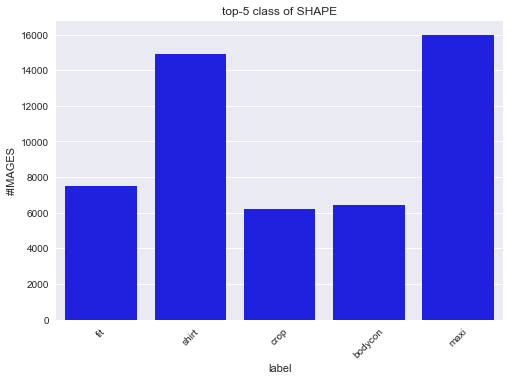

In [19]:
import seaborn as sb

# gen_order = df['label'].value_count().index
sb.countplot(data=df, x='label', color='blue')
# plt.bar(df, label=df['label'], color='blue')
# plt.legend()
plt.ylabel('#IMAGES')
plt.xticks(rotation=45)
plt.title('top-5 class of SHAPE')
plt.savefig('shape.png')
plt.show()

In [10]:
df.head(3)

,label,path
0,fit,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg
1,shirt,img/Sheer_Pleated-Front_Blouse/img_00000013.jpg
2,shirt,img/Sheer_Pleated-Front_Blouse/img_00000045.jpg


# CLASS BALANCE

In [11]:
## balance classes
UPPER_LIMIT = 6000#8000

count_dict = defaultdict(lambda : 0)

labels =[]
paths =[]

for i,l in enumerate(image_label):
    if l=='maxi' or l =='shirt' or l =='fit' or l=='bodycon' or l=='crop':
        if count_dict[l] < UPPER_LIMIT:
            labels.append(image_label[i])
            paths.append(image_path[i])
    count_dict[l]+=1
    
df = pd.DataFrame({'path':paths,'label':labels})
Counter(df['label'])

Counter({'bodycon': 6000,
         'crop': 6000,
         'fit': 6000,
         'maxi': 6000,
         'shirt': 6000})

In [12]:
## PREPARE   TRAIN , TEST , VALIDATION :STRATIFIED
TEST_SIZE = 0.999

X_train, X_test, y_train, y_test = train_test_split(df['path'], df['label'],stratify=df['label'], test_size=TEST_SIZE)

train = pd.DataFrame({'path':X_train,'label':y_train})
test_data = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_train, X_test, y_train, y_test
print "TRAIN data size "
print train.shape

print "TEST and VALIDATION data size  "
print test_data.shape

X_val, X_test, y_val, y_test = train_test_split(test_data['path'], test_data['label'],stratify=test_data['label'], test_size=0.25)

val = pd.DataFrame({'path':X_val,'label':y_val})
test = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_val, X_test, y_val, y_test,df

Counter(test['label'])


#  ====== DROP INDEXES ============


val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

TRAIN data size 
(30, 2)
TEST and VALIDATION data size  
(29970, 2)


In [13]:
print sum(Counter(test['label']).values())
print sum(Counter(val['label']).values())

7493
22477


In [13]:
val.head()

,label,path
0,fit,img/Floral_Print_Drawstring_Shorts/img_0000001...
1,maxi,img/Crochet-Paneled_Maxi_Dress/img_00000032.jpg
2,fit,img/LEEF_PARIS_Abstract_Geo_Print_Tee/img_0000...
3,shirt,img/Dotted_Chiffon_Blouse/img_00000163.jpg
4,fit,img/Classic_Scoop_Neck_Top/img_00000053.jpg


In [14]:
test.head()

,label,path
0,bodycon,img/Tribal_Patterned_Bodycon_Dress/img_0000000...
1,fit,img/Ribbed_Fit_&_Flare_Dress/img_00000006.jpg
2,fit,img/Fit_&_Flare_Tee_Dress/img_00000028.jpg
3,crop,img/Cropped_Purl_Knit_Sweater/img_00000009.jpg
4,shirt,img/Leaf_Print_Blouse/img_00000045.jpg


In [14]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri3/test/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri3/test/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        #print label
        src = img_path+data.iloc[i]['path']
        #print src
        #print dest_dir+'/'+label
        #break
        
        'kgfdsuayezutrxykclufgohiJ:PUOYTira'
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(test)    

Total Images : 7493
0
1000
2000
3000
4000
5000
6000
7000


In [15]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri3/val/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri3/val/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        src = img_path+data.iloc[i]['path']
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(val)    

Total Images : 22477
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


In [15]:
N_CLASSES = 5